In [3]:
# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# sklearn modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImPipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Dataset

In [51]:
# Load the dataset (if it's in the same directory as your code file)
file_path = '/Users/richardhuang/Documents/GitHub/Projects/AI for Bio/healthcare-dataset-stroke-data.csv'

data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [52]:
data = data.drop(columns = ['id'])
# Drop rows where gender is 'other' and reset the index
data = data[data['gender'] != 'Other'].reset_index(drop=True)

In [6]:

data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

# Convert ever_married: 0 for Yes, 1 for No
data['ever_married'] = data['ever_married'].map({'Yes': 0, 'No': 1})

# Convert work_type: 0 for Private, 1 for Self-employed, 2 for Govt job, 3 for Children
data['work_type'] = data['work_type'].map({
    'Private': 0,
    'Self-employed': 1,
    'Govt_job': 2,
    'children': 3,
    'Never_worked': 4
})

# Convert Residence_type: 0 for Urban, 1 for Rural
data['Residence_type'] = data['Residence_type'].map({'Urban': 0, 'Rural': 1})

# Convert smoking_status: 0 for Formerly smoked, 1 for Never smoked, 2 for Smokes, 3 for Unknown
data['smoking_status'] = data['smoking_status'].map({
    'formerly smoked': 0,
    'never smoked': 1,
    'smokes': 2,
    'Unknown': 3  # Assuming 'unknown' is a possible category
})

# Display the updated DataFrame
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,0,0,228.69,36.6,0,1
1,0,61.0,0,0,0,1,1,202.21,NaN,1,1
2,1,80.0,0,1,0,0,1,105.92,32.5,1,1
3,0,49.0,0,0,0,0,0,171.23,34.4,2,1
4,0,79.0,1,0,0,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,80.0,1,0,0,0,0,83.75,NaN,1,0
5105,0,81.0,0,0,0,1,0,125.20,40.0,1,0
5106,0,35.0,0,0,0,1,1,82.99,30.6,1,0
5107,1,51.0,0,0,0,0,1,166.29,25.6,0,0


In [42]:
data.describe()

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000,5109.000000
mean,0.413975,43.229986,0.343707,0.838129,0.491877,106.140399,28.89456,1.585829,0.048738
std,0.492592,22.613575,0.474991,1.118746,0.499983,45.285004,7.85432,1.092404,0.215340
min,0.000000,0.080000,0.000000,0.000000,0.000000,55.120000,10.30000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,77.240000,23.50000,1.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,0.000000,91.880000,28.10000,1.000000,0.000000
75%,1.000000,61.000000,1.000000,2.000000,1.000000,114.090000,33.10000,3.000000,0.000000
max,1.000000,82.000000,1.000000,4.000000,1.000000,271.740000,97.60000,3.000000,1.000000


# Missing Data

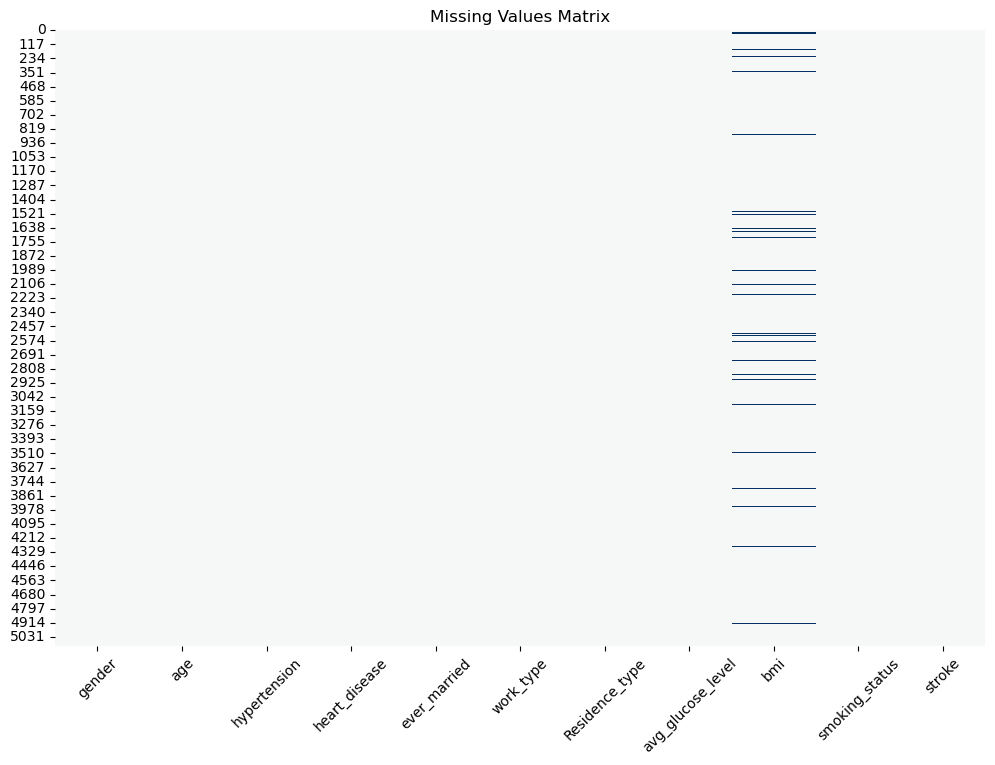

In [8]:
missing_matrix = data.isnull()

plt.figure(figsize=(12, 8))
sns.heatmap(missing_matrix, cbar=False, cmap='RdBu', center=0) 
plt.xticks(rotation=45)
plt.title('Missing Values Matrix')
plt.show()

In [9]:
missing_percentage = data.isnull().mean() * 100
missing_percentage_table = pd.DataFrame(missing_percentage[missing_percentage > 0], columns=['missing_percentage'])

print(missing_percentage_table)

     missing_percentage
bmi            3.934234


In [53]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [54]:
data['hypertension'] = data['hypertension'].astype(str)
data['heart_disease'] = data['heart_disease'].astype(str)

In [55]:
X = data.drop(columns=['stroke'])
y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Impute missing values on the training set
imputer = SimpleImputer(strategy='mean')  # or use 'median' depending on your preference
X_train['bmi'] = imputer.fit_transform(X_train[['bmi']])

# Step 3: Apply the same imputation on the test set
X_test['bmi'] = imputer.transform(X_test[['bmi']])
# Remove outliers from 'avg_glucose_level' and 'bmi'
#X_train = remove_outliers(X_train, 'avg_glucose_level')
#X_train = remove_outliers(X_train, 'bmi')
# Verify the range of 'age' after filtering
X_train




,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
802,Male,79.00,0,0,Yes,Self-employed,Rural,112.64,28.5,formerly smoked
3926,Female,62.00,0,0,Yes,Private,Urban,88.32,36.3,Unknown
2337,Female,21.00,0,0,No,Private,Rural,59.52,33.7,never smoked
3909,Male,31.00,0,0,Yes,Govt_job,Urban,65.70,30.4,formerly smoked
1886,Female,31.00,0,0,No,Private,Rural,59.63,19.9,never smoked
...,...,...,...,...,...,...,...,...,...,...
4426,Female,61.00,0,0,Yes,Private,Rural,144.14,29.8,never smoked
466,Female,61.00,1,0,Yes,Private,Rural,170.05,60.2,smokes
3092,Female,1.16,0,0,No,children,Urban,97.28,17.8,Unknown
3772,Female,38.00,0,0,Yes,Govt_job,Rural,93.93,21.5,never smoked


# Exploratory Data Analysis

## Correlation 

## bmi vs age by gender

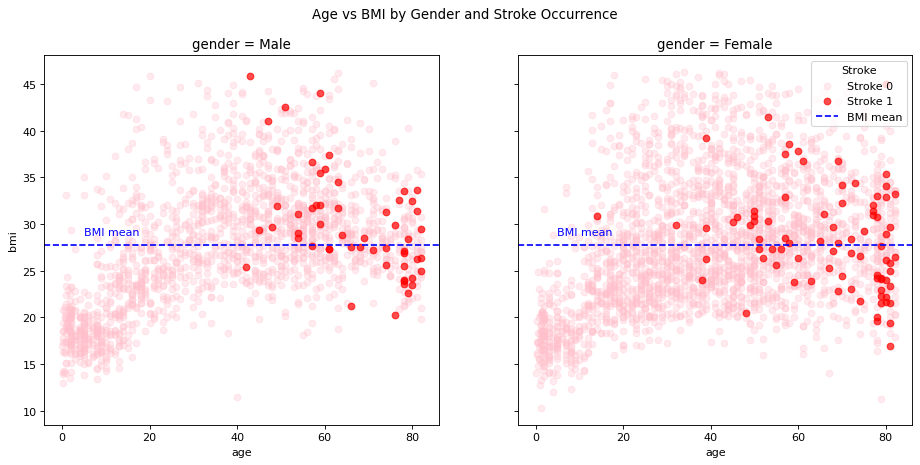

In [237]:
mean_bmi = data['bmi'].mean()

# Create a figure and subplots for each gender
genders = data['gender'].unique()
fig, axes = plt.subplots(1, len(genders), figsize=(14, 6), sharey=True)

for i, gender in enumerate(genders):
    ax = axes[i]
    gender_data = data[data['gender'] == gender]

    # Plot stroke cases with different transparency
    for stroke_status in [0, 1]:
        subset = gender_data[gender_data['stroke'] == stroke_status]
        ax.scatter(
            subset['age'],
            subset['bmi'],
            alpha=0.3 if stroke_status == 0 else 0.7,
            color='red' if stroke_status == 1 else 'pink',
            label=f'Stroke {stroke_status}'
        )

    # Plot the mean BMI line
    ax.axhline(mean_bmi, color='blue', linestyle='--', label='BMI mean')
    ax.text(5, mean_bmi + 1, 'BMI mean', color='blue')  # Adjust position as needed

    # Set labels and titles
    ax.set_title(f'gender = {gender}')
    ax.set_xlabel('age')
    if i == 0:  # Set y-label only for the first subplot
        ax.set_ylabel('bmi')

# Adding legend to the last subplot
axes[-1].legend(title='Stroke', loc='upper right')

plt.suptitle('Age vs BMI by Gender and Stroke Occurrence')
plt.show()


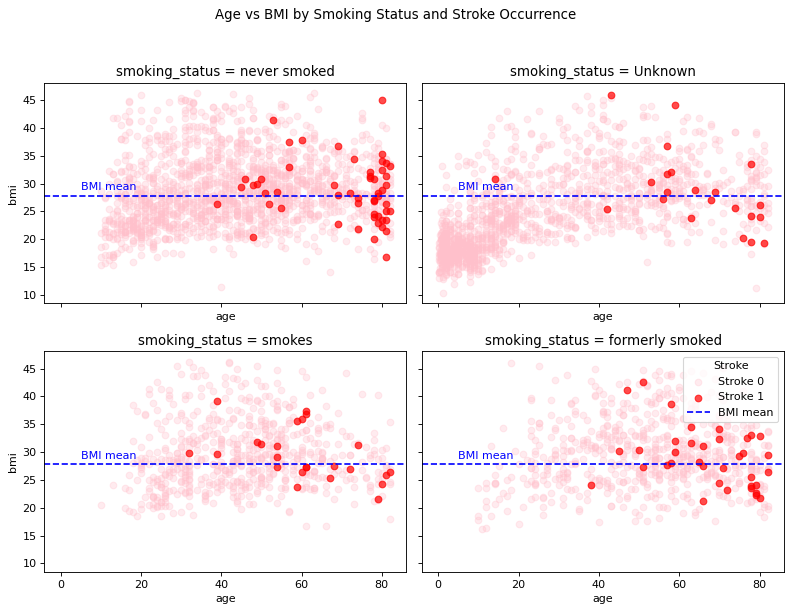

In [238]:
mean_bmi = data['bmi'].mean()

# Unique smoking statuses
smoking_statuses = data['smoking_status'].unique()
n_statuses = len(smoking_statuses)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=True, sharex=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, smoking_status in enumerate(smoking_statuses):
    ax = axes[i]
    smoking_data = data[data['smoking_status'] == smoking_status]

    # Plot stroke cases with different transparency
    for stroke_status in [0, 1]:
        subset = smoking_data[smoking_data['stroke'] == stroke_status]
        ax.scatter(
            subset['age'],
            subset['bmi'],
            alpha=0.3 if stroke_status == 0 else 0.7,
            color='red' if stroke_status == 1 else 'pink',
            label=f'Stroke {stroke_status}'
        )

    # Plot the mean BMI line
    ax.axhline(mean_bmi, color='blue', linestyle='--', label='BMI mean')
    ax.text(5, mean_bmi + 1, 'BMI mean', color='blue')  # Adjust position as needed

    # Set labels and titles
    ax.set_title(f'smoking_status = {smoking_status}')
    ax.set_xlabel('age')
    if i % 2 == 0:  # Set y-label only for the first column
        ax.set_ylabel('bmi')

# Hide any extra subplots if smoking statuses are less than 4
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adding legend to the last occupied subplot
axes[i].legend(title='Stroke', loc='upper right')

plt.suptitle('Age vs BMI by Smoking Status and Stroke Occurrence')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the super title
plt.show()


## Distribution of categorical variables 

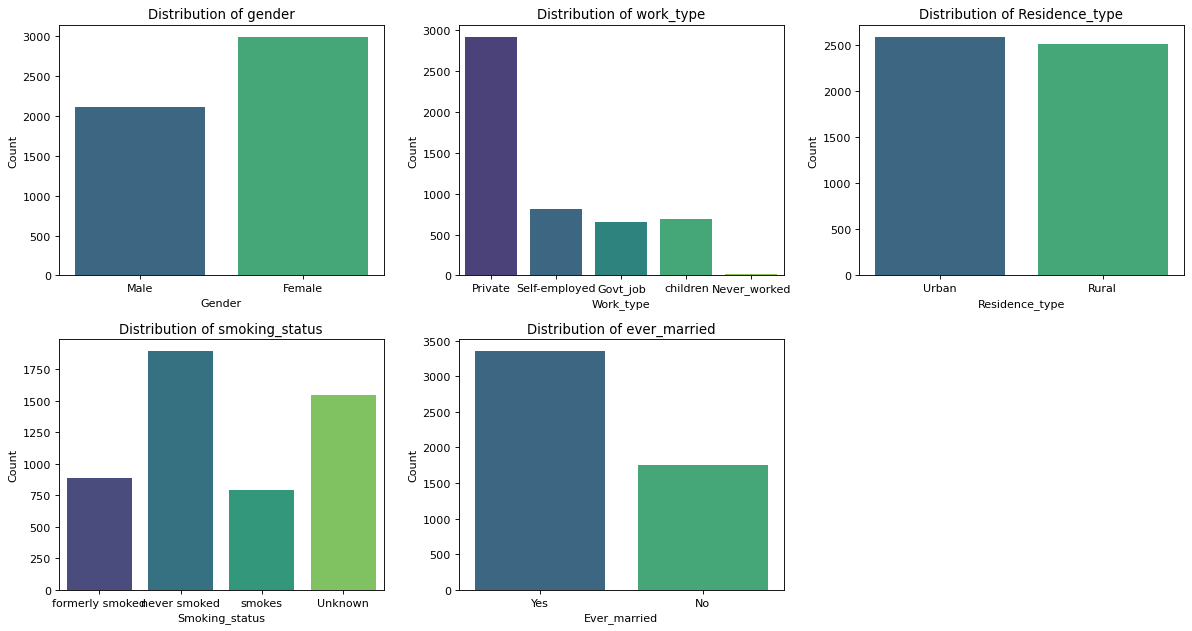

In [87]:
# List of categorical columns
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status', 'ever_married']

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Loop through each categorical column and create a bar plot
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)  # Create a 2x2 grid of plots
    sns.countplot(x=column, data=data, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Diistribution of Numerical Variables

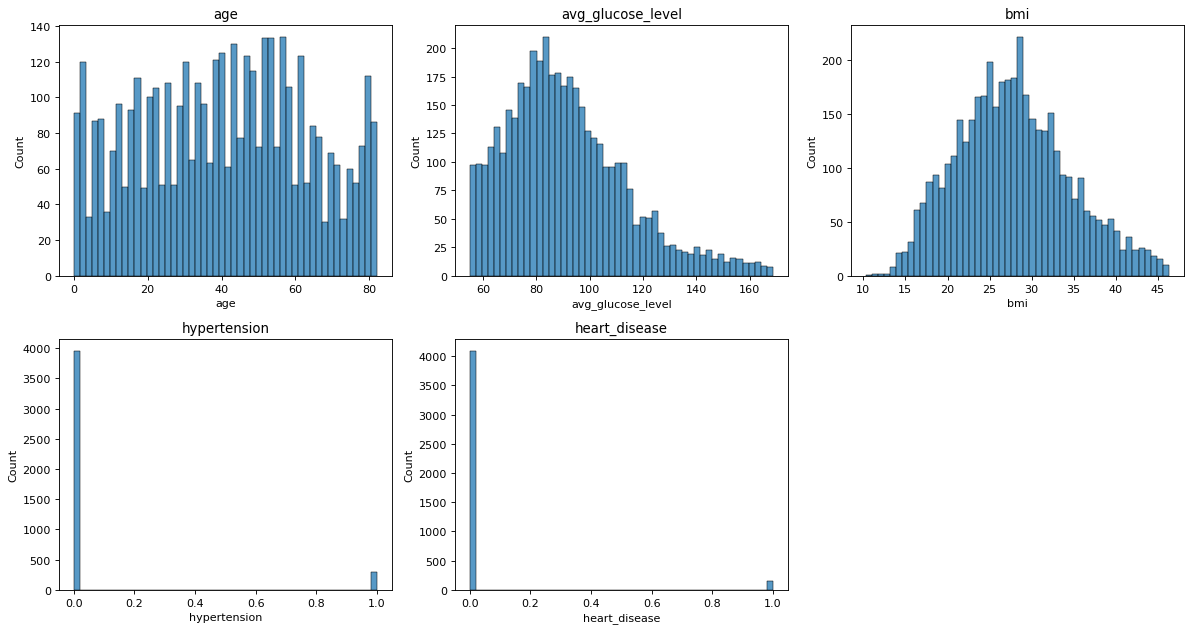

In [239]:
con_columns = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', ]
n_floats = len(con_columns)

n_cols = 3
n_rows = 2

fig, axes = plt.subplots(figsize=(15, 8), ncols=n_cols, nrows=n_rows)
axes = axes.flatten()

for i in range(n_floats):
    sns.histplot(data=data[con_columns[i]], bins=50, ax=axes[i])
    axes[i].set_title(con_columns[i])
    
fig.delaxes(axes[n_floats])
plt.tight_layout()
plt.show()

# Imbalanced Data 

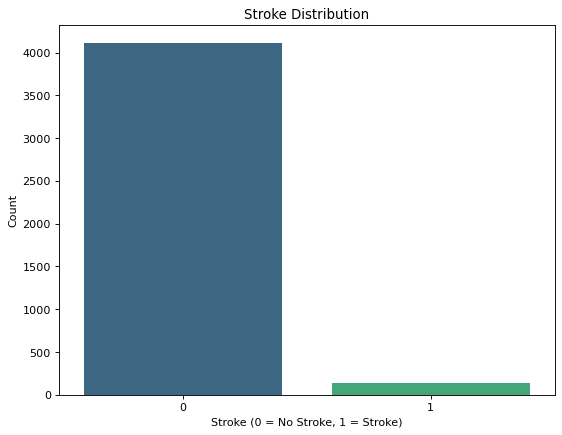

In [242]:
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=data, palette='viridis')
plt.title('Stroke Distribution')
plt.xlabel('Stroke (0 = No Stroke, 1 = Stroke)')
plt.ylabel('Count')
plt.show()

In [243]:
from imblearn.over_sampling import SMOTE



# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

# Check the distribution of the target variable after oversampling
print("Original training target distribution:\n", y_train.value_counts())
print("Resampled training target distribution:\n", y_train_resampled.value_counts())


Original training target distribution:
 stroke
0    3900
1     187
Name: count, dtype: int64
Resampled training target distribution:
 stroke
0    3900
1    3900
Name: count, dtype: int64


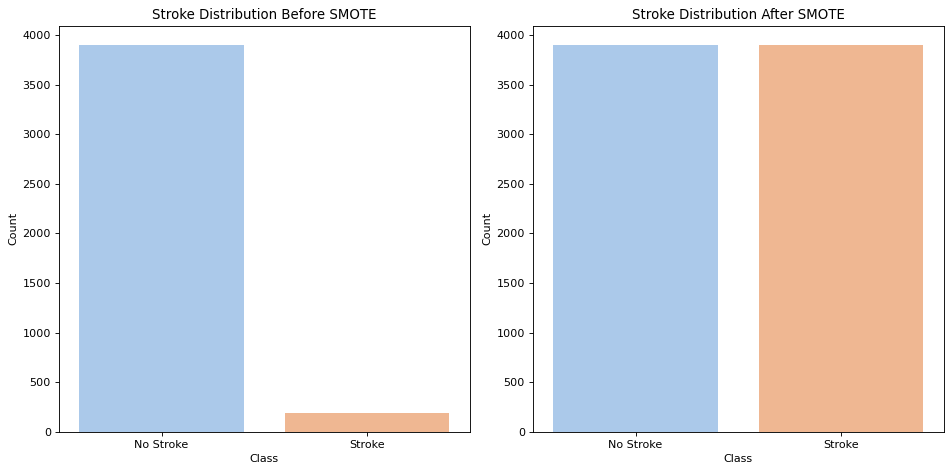

In [221]:
from collections import Counter

original_dist = Counter(y_train)
resampled_dist = Counter(y_train_resampled)

# Prepare data for plotting
dist_df = pd.DataFrame({
    'Class': ['No Stroke', 'Stroke'],
    'Original': [original_dist[0], original_dist[1]],
    'Resampled': [resampled_dist[0], resampled_dist[1]]
})

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original Distribution
sns.barplot(x='Class', y='Original', data=dist_df, ax=axes[0], palette="pastel")
axes[0].set_title("Stroke Distribution Before SMOTE")
axes[0].set_ylabel("Count")

# Resampled Distribution
sns.barplot(x='Class', y='Resampled', data=dist_df, ax=axes[1], palette="pastel")
axes[1].set_title("Stroke Distribution After SMOTE")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


# Models Fitting

## Pipeline 

In [56]:

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import dalex as dx
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_features_standardized = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']

# Categorical transformer using OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Numerical transformer using StandardScaler
numerical_transformer_standardized = Pipeline(steps=[
    ('standardize', StandardScaler())
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num_std', numerical_transformer_standardized, numerical_features_standardized)
])

# Pipeline for Logistic Regression
clf_logreg = ImPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', RandomOverSampler(sampling_strategy='minority', random_state=42)),
    ('model', LogisticRegression(C = 0.5, penalty = 'none', random_state=123))
])

# Pipeline for Gradient Boosting Classifier
clf_gbm = ImPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', RandomOverSampler(sampling_strategy='minority', random_state=42)),
    ('model', GradientBoostingClassifier(n_estimators=100,  max_depth=2,learning_rate =0.1 ,random_state=123
    ))])

# Pipeline for Random Forest Classifier
clf_forest = ImPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', RandomOverSampler(sampling_strategy='minority', random_state=42)),
    ('model', RandomForestClassifier(n_estimators=250, max_depth=5,random_state=123))
])

clf_forest_2 = ImPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', RandomOverSampler(sampling_strategy='minority', random_state=42)),
    ('model', RandomForestClassifier(n_estimators=250, max_depth=2,random_state=123))
])

# Pipeline for XGBoost Classifier
clf_xgb = ImPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', RandomOverSampler(sampling_strategy='minority', random_state=42)),
    ('model', XGBClassifier(n_estimator = 250, max_depth = 1, random_state=42))
])


## Models Performance

In [57]:
clf_logreg.fit(X_train, y_train)
clf_forest.fit(X_train, y_train)
clf_gbm.fit(X_train, y_train)
clf_xgb.fit(X_train, y_train)
clf_forest_2.fit(X_train, y_train)


exp_logreg = dx.Explainer(clf_logreg, X_test, y_test, verbose=False)
exp_gbm = dx.Explainer(clf_gbm, X_test, y_test, verbose=False)
exp_forest = dx.Explainer(clf_forest, X_test, y_test, verbose=False)
exp_xgb = dx.Explainer(clf_xgb, X_test, y_test, verbose=False)
exp_forest_2 = dx.Explainer(clf_forest_2, X_test, y_test, verbose=False)


concatenated_df = pd.concat([exp.model_performance().result for exp in [exp_logreg, exp_forest, exp_gbm,exp_xgb,exp_forest_2 ]])
concatenated_df

,recall,precision,f1,accuracy,auc
LogisticRegression,0.806452,0.158228,0.264550,0.727984,0.846220
RandomForestClassifier,0.887097,0.174603,0.291777,0.738748,0.848438
GradientBoostingClassifier,0.709677,0.159420,0.260355,0.755382,0.827008
XGBClassifier,0.822581,0.160883,0.269129,0.728963,0.838651
RandomForestClassifier,0.887097,0.139949,0.241758,0.662427,0.841675


In [58]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the four models
y_score_logreg = clf_logreg.predict_proba(X_test)[:, 1]
y_score_rf = clf_forest.predict_proba(X_test)[:, 1]
y_score_gb = clf_gbm.predict_proba(X_test)[:, 1]
y_score_xgb = clf_xgb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_score_logreg)
auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_score_gb)
auc_gb = auc(fpr_gb, tpr_gb)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Create the figure
fig = go.Figure()

# Add ROC curves for each model
fig.add_trace(go.Scatter(x=fpr_logreg, y=tpr_logreg, mode='lines', 
                         name=f'Logistic Regression (AUC={auc_logreg:.4f})'))

fig.add_trace(go.Scatter(x=fpr_rf, y=tpr_rf, mode='lines', 
                         name=f'Random Forest (AUC={auc_rf:.4f})'))

fig.add_trace(go.Scatter(x=fpr_gb, y=tpr_gb, mode='lines', 
                         name=f'Gradient Boosting (AUC={auc_gb:.4f})'))

fig.add_trace(go.Scatter(x=fpr_xgb, y=tpr_xgb, mode='lines', 
                         name=f'XGBoost (AUC={auc_xgb:.4f})'))

# Add diagonal line representing the no skill classifier
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1,
    name='No Skill'
)

# Update the layout
fig.update_layout(
    title_text="ROC Curve Comparison for All Models",
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    width=1000,
    height=600
)

# Show the plot
fig.show()

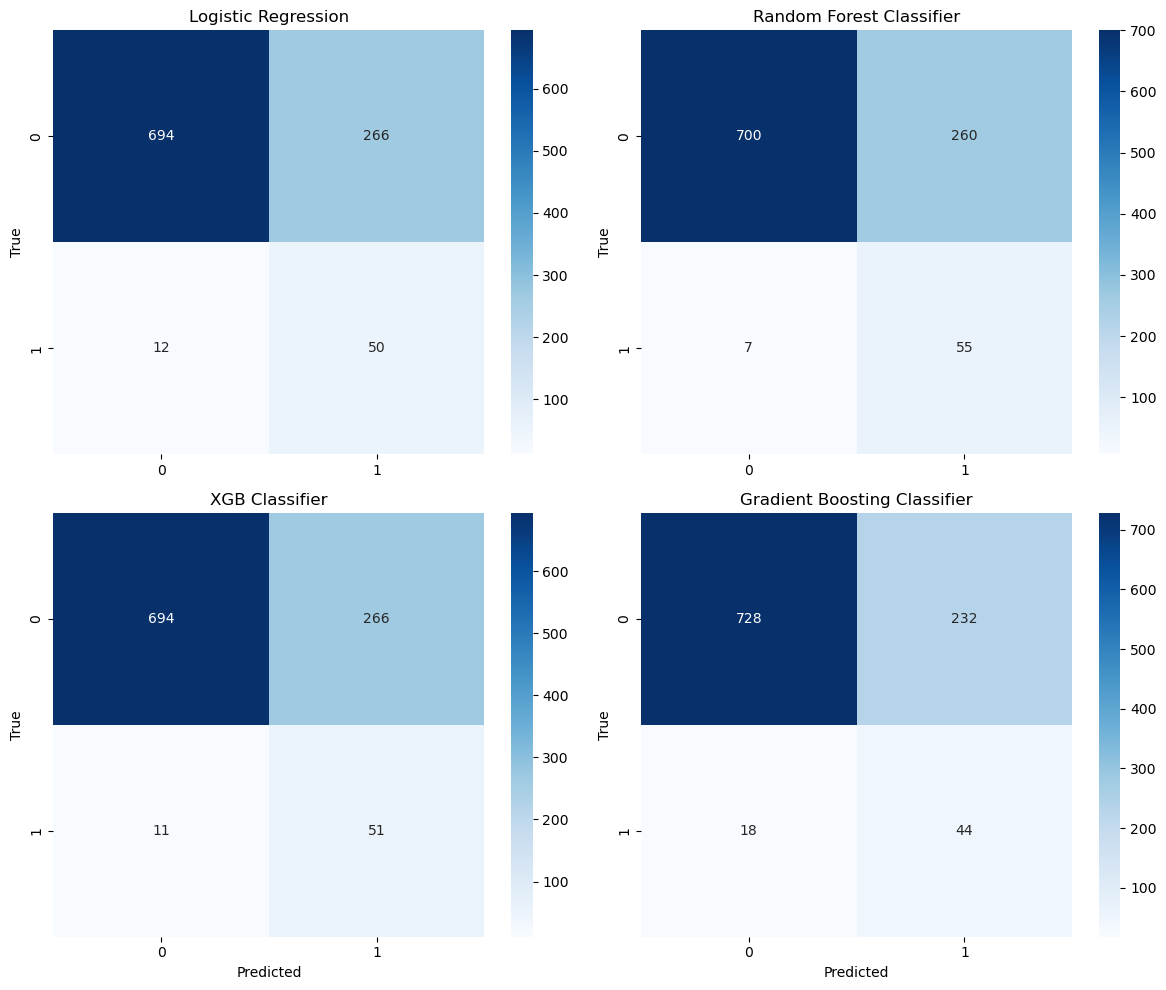

In [59]:
y_pred_test_log = clf_logreg.predict(X_test)
y_pred_test_rf = clf_forest.predict(X_test)
y_pred_test_gbm = clf_gbm.predict(X_test)
y_pred_test_xgb = clf_xgb.predict(X_test)


conf_matrix_rf = confusion_matrix(y_test, y_pred_test_rf)
conf_matrix_log = confusion_matrix(y_test, y_pred_test_log)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_test_gbm)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_test_xgb)


class_labels = ['0', '1']  

conf_matrix_log = confusion_matrix(y_test, y_pred_test_log)
conf_matrix_rf = confusion_matrix(y_test, y_pred_test_rf)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_test_xgb)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_test_gbm)

plt.figure(figsize=(12, 10))

# Logistic Regression
plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True')
plt.title('Logistic Regression')

# Random Forest Classifier
plt.subplot(2, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('True')
plt.title('Random Forest Classifier')

# Support Vector Classifier
plt.subplot(2, 2, 3)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGB Classifier')

# Gradient Boosting Classifier
plt.subplot(2, 2, 4)
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gradient Boosting Classifier')

plt.tight_layout()
plt.savefig('Confusion matrix.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Model Interpretation (Explainable AI)

In [29]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


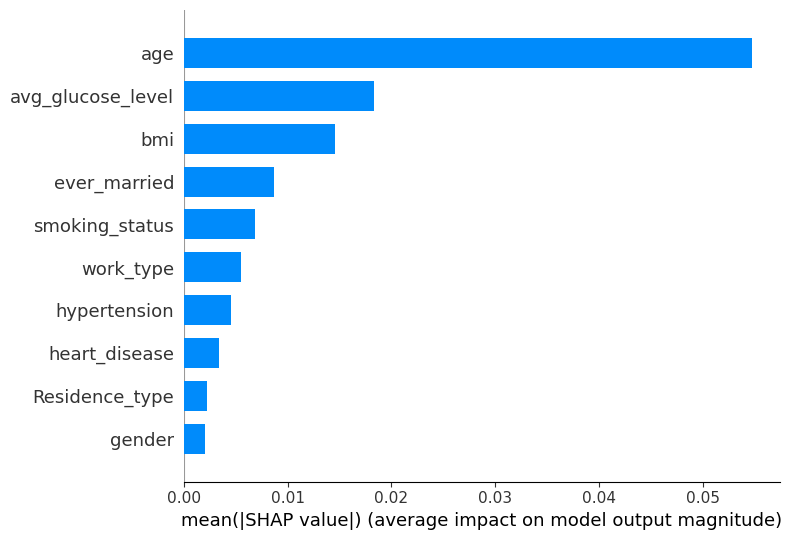

In [37]:
from sklearn.ensemble import RandomForestRegressor
# Create object that can calculate shap values
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train);

# Create object that can calculate shap values
explainer = shap.TreeExplainer(regressor)
# Calculate Shap values
shap_values = explainer.shap_values(X_train)



shap.summary_plot(shap_values, X_train, feature_names=X_train.columns, plot_type="bar")

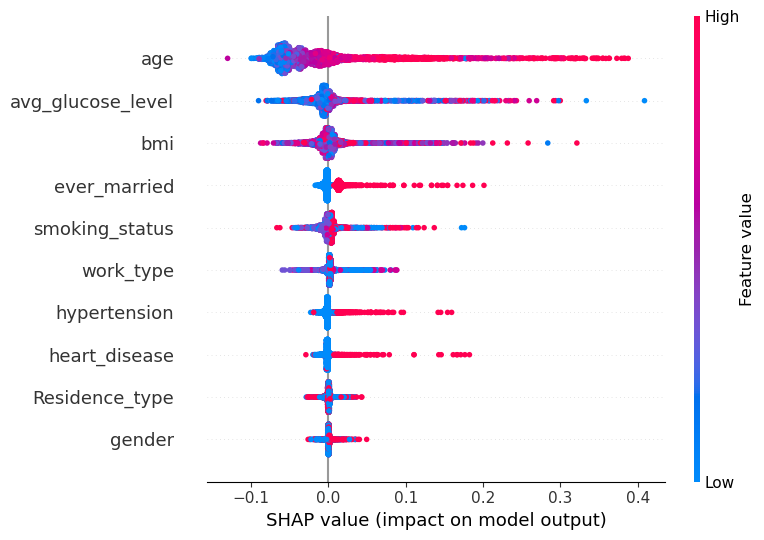

In [181]:
features= X_train.columns
shap.summary_plot(shap_values, X_train, feature_names=features)

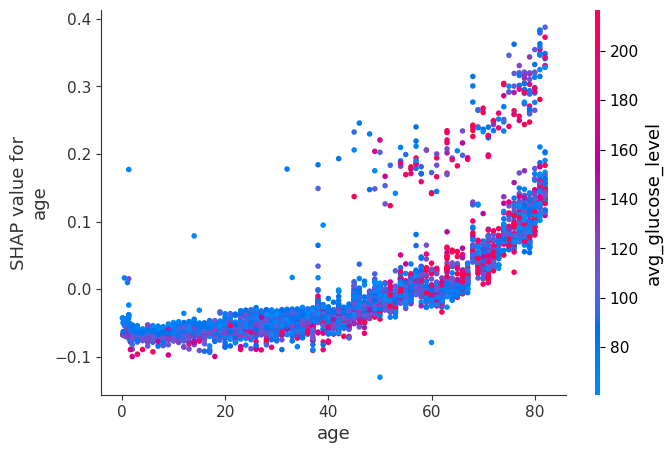

In [192]:
shap.dependence_plot(1, shap_values, X_train, feature_names=features)

In [60]:
exp_forest.model_parts().plot() 
exp_forest_2.model_parts().plot() 


In [67]:
pd_rf = exp_forest.model_profile(variables=['age', 'avg_glucose_level'])
pd_logreg = exp_logreg.model_profile(variables=['age', 'avg_glucose_level'])
pd_xgb = exp_xgb.model_profile(variables=['age', 'avg_glucose_level'])
pd_gbm = exp_gbm.model_profile(variables=['age', 'avg_glucose_level'])

# Remove the title by setting title to None
pd_rf.plot(objects=[pd_logreg, pd_xgb, pd_gbm], title=None)

Calculating ceteris paribus: 100%|██████████| 2/2 [00:00<00:00, 24.85it/s]


In [64]:
pd_rf = exp_forest.model_profile(variables = ['age'],groups = 'ever_married')
pd_rf.plot()

Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


In [62]:
pd_rf_ca = exp_forest.model_profile(variable_type = 'categorical', variables = ['ever_married','work_type', 'smoking_status','hypertension','heart_disease'] )
pd_rf_ca.plot(geom = 'profiles')

Calculating ceteris paribus: 100%|██████████| 5/5 [00:00<00:00, 44.80it/s]


In [162]:
protected = X_test.gender
mf_gbm = exp_gbm.model_fairness(protected=protected, 
                                  privileged = "Male")

mf_forest = exp_forest.model_fairness(protected=protected, 
                                  privileged = "Male")

mf_logreg = exp_logreg.model_fairness(protected=protected, 
                                  privileged = "Male")

mf_XGB = exp_xgb.model_fairness(protected=protected, 
                                  privileged = "Male")

In [163]:
mf_gbm.plot(objects=[mf_logreg, mf_forest, mf_XGB])